<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Bajaj_Finserv_Stock_Analysis_with_LSTM%2C_RNN%2C_ARIMAX%2C_AR_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 14.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 14.2 MB/s 


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings 
warnings.filterwarnings('ignore')
import datetime as dt
from pandas.tseries.offsets import DateOffset
import statsmodels.api as sm
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] =(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [4]:
# upload files on google colab drive
from google.colab import files
uploaded = files.upload()

Saving BAJAJFINSV.csv to BAJAJFINSV.csv


Time-series forcasting is one of most exciting fields of application in the domain of data science. It has endless supply of problems from various topics of interest, such as - in finance, forcasting stock prices and trend behavior overtime, global issues such as forcasting unemployement in each quater, also in medical- number of babies born every minutes, number of new cases under a pandemic, to name a few.

In [5]:
import numpy as np 
import pandas as pd
import lightgbm as lgb
from numpy.random import normal, seed
import math
from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import pyplot
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy.stats import norm
import scipy.stats as scs

from fbprophet import Prophet

In [6]:
df = pd.read_csv("BAJAJFINSV.csv", parse_dates=["Date"],index_col="Date")
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [7]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
2021-04-27,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
2021-04-28,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
2021-04-29,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151
2021-04-30,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257223e+14,85986.0,129995,0.1556


VWAP: Volume Weighted Average Price,the target variable to predict. VWAP is a trading benchmark used by traders that gives the average price the stock has traded at throughout the day, based on both volume and price.

In [8]:
df.shape

(3201, 14)

In [9]:
df.isna().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [10]:
print("Percentage of missing trade values = {:.2f}".format(100*(df['Trades'].isna().sum())/df.shape[0]))

Percentage of missing trade values = 23.27


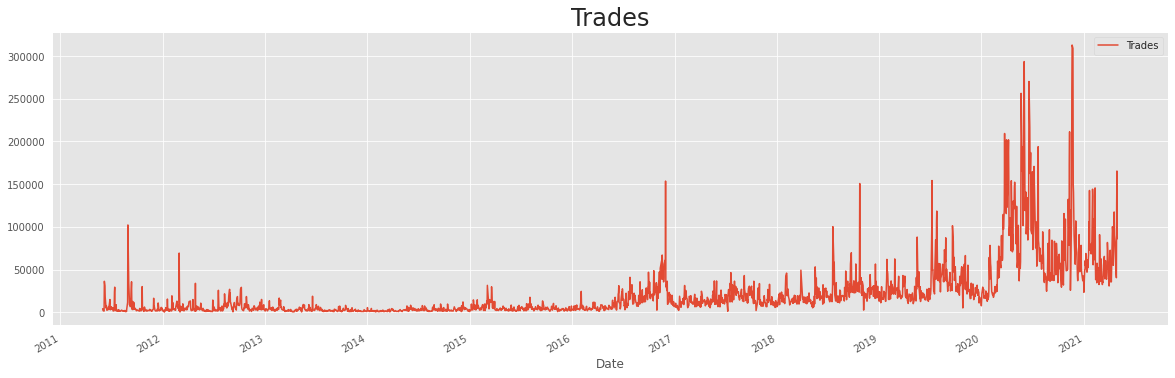

In [11]:
ax = df[['Trades']].plot(figsize=(20, 6))
ax.set_title('Trades', fontsize=24);

We can see that trade values show a pulse in growth from the period of 2020 - 2021. To fill the NaN values, perhaps the safest option is to forward fill. But since many consecutive rows have missing values, we can fill with mean value.

In [12]:
df['Trades'].ffill(axis = 0) 
trade_data = df.loc[df.index<='2019']
mean = round(trade_data['Trades'].mean(),1)
df["Trades"].fillna(value = mean,inplace = True)

Visualizing trends in stock prices

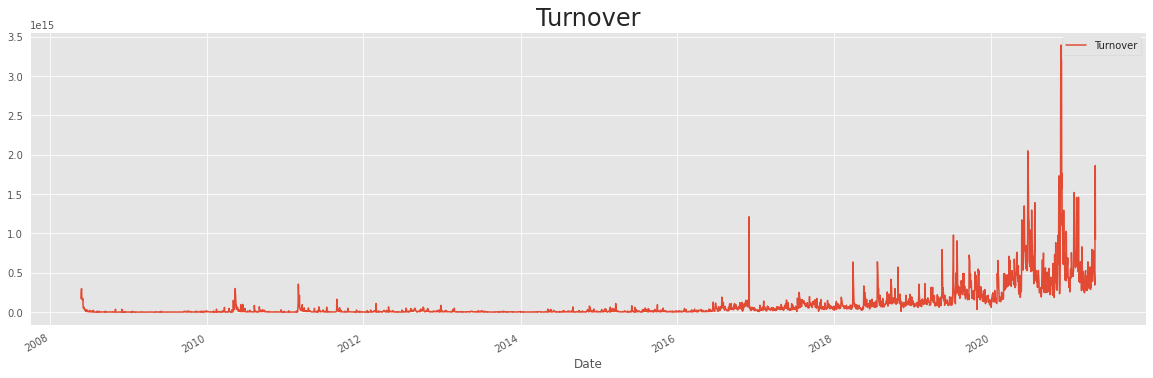

In [13]:
ax = df[['Turnover']].plot(figsize=(20, 6))
ax.set_title('Turnover', fontsize=24);

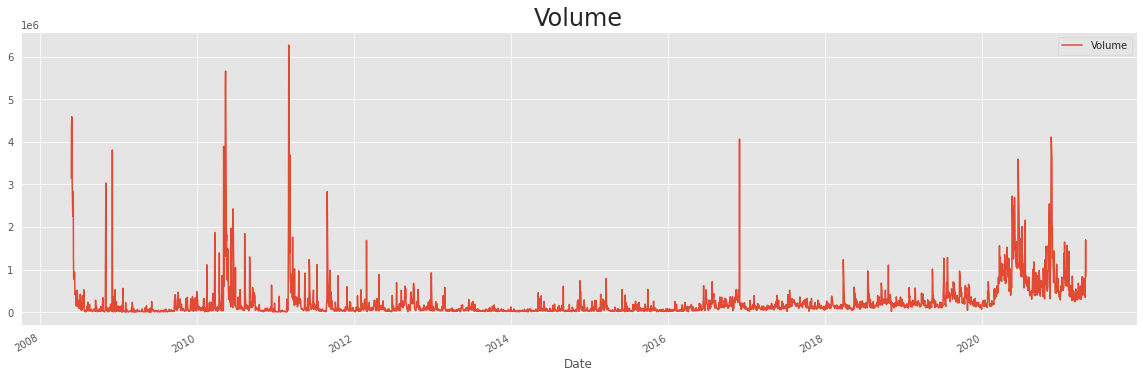

In [14]:
ax = df[['Volume']].plot(figsize=(20, 6))
ax.set_title('Volume', fontsize=24);

The volume of shares traded showed a sharp growth during the period of 20-21.

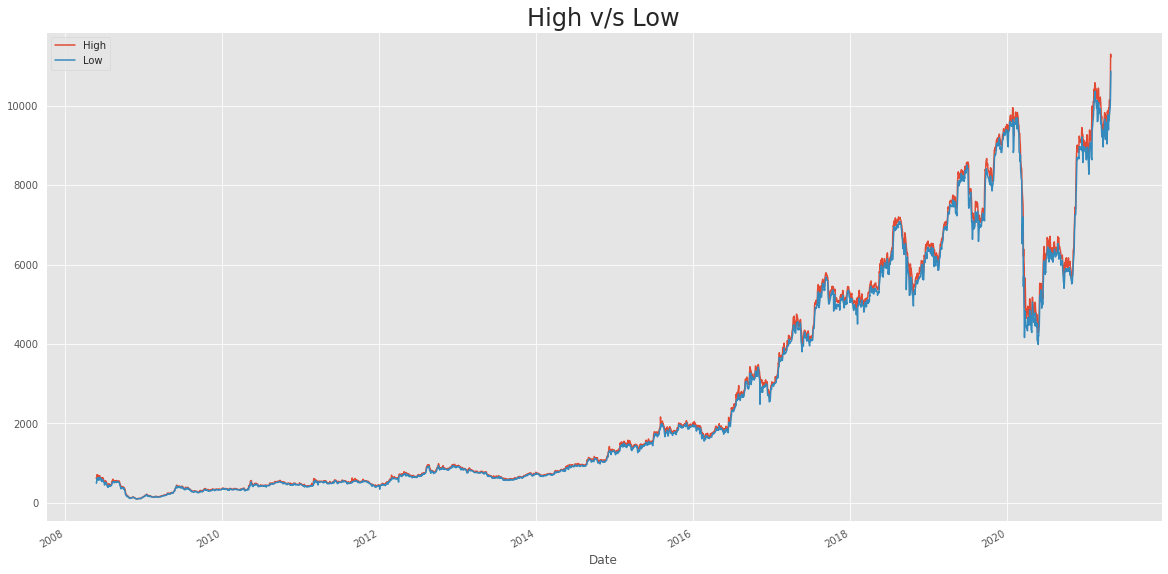

In [15]:
ax = df[['High', 'Low']].plot(figsize=(20, 10))
ax.set_title('High v/s Low', fontsize=24);

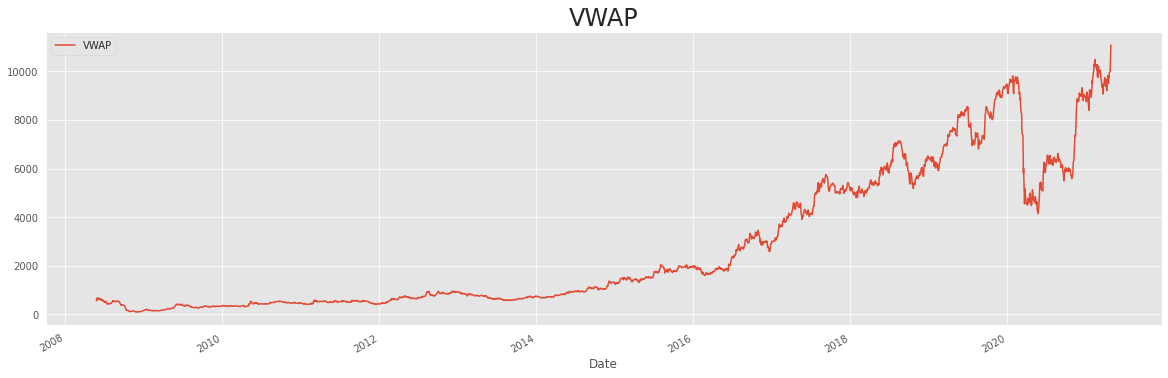

In [16]:
ax = df[['VWAP']].plot(figsize=(20, 6))
ax.set_title('VWAP', fontsize=24);

Even though turnover and volume increased during the year 20-21, the prices dropped significantly. This explains the fact that, due to the pandemic Covid-19, many investors took the advantage of dropping prices to buy stocks in bulk, perhaps looking forward to sell when industries regain momentum.

Text(0.5, 1.0, 'End of year VWAP for Bajaj Finserv')

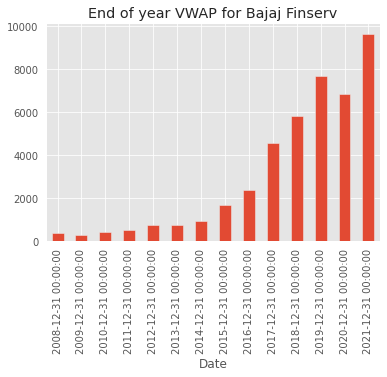

In [17]:
df['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('End of year VWAP for Bajaj Finserv')

Text(0.5, 1.0, 'Yearly Mean VWAP for Bajaj Finserv')

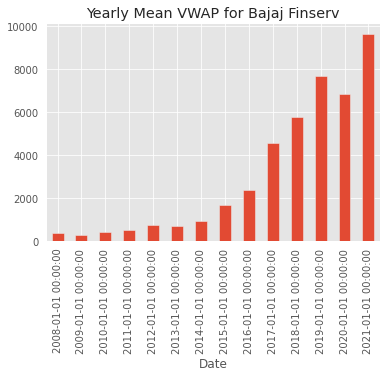

In [18]:
df['VWAP'].resample('AS').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Bajaj Finserv')

Text(0.5, 1.0, 'Monthly Mean 2010 VWAP for Bajaj Finserv')

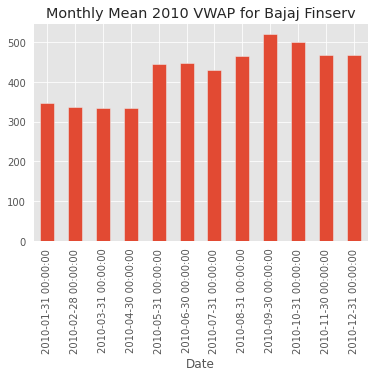

In [19]:
df['VWAP']['2010'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2010 VWAP for Bajaj Finserv')

Text(0.5, 1.0, 'Monthly Mean 2015 VWAP for Bajaj Finserv')

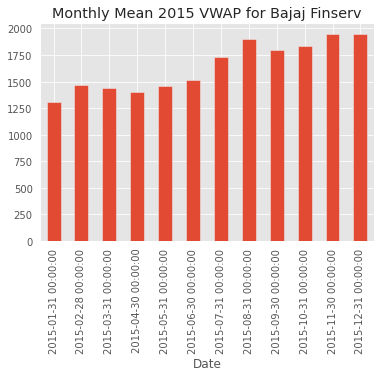

In [20]:
df['VWAP']['2015'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2015 VWAP for Bajaj Finserv')

Text(0.5, 1.0, 'Monthly Mean 2020 VWAP for Bajaj Finserv')

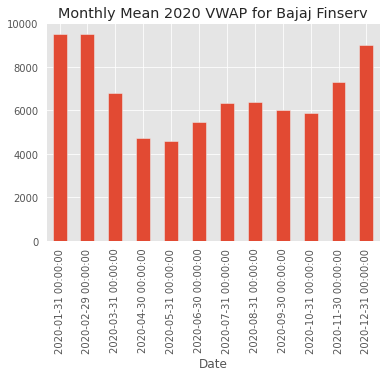

In [21]:
df['VWAP']['2020'].resample('M').mean().plot(kind='bar')
plt.title('Monthly Mean 2020 VWAP for Bajaj Finserv')

Box-Cox Transformation - to generate a uniform distribution.

Lambda: -0.031969


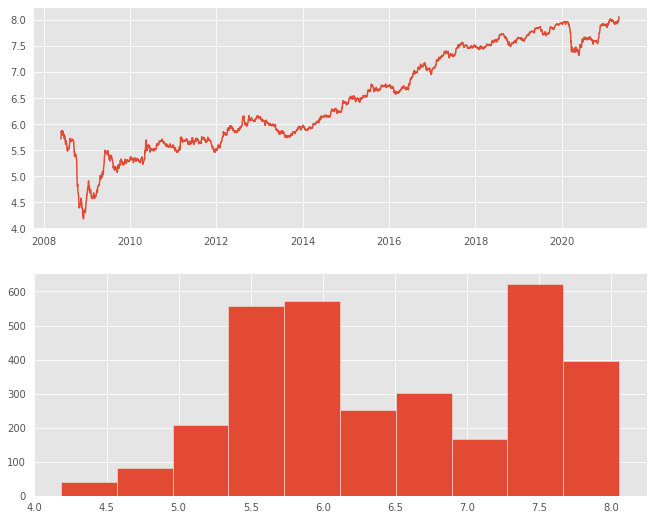

In [22]:
from scipy.stats import boxcox
df['vwap_boxcox'],lam = boxcox(df['VWAP'])
print('Lambda: %f' % lam)
rcParams['figure.figsize'] = 11, 9
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df['vwap_boxcox'])
# histogram
pyplot.subplot(212)
pyplot.hist(df['vwap_boxcox'])
pyplot.show()

Moving average smoothing

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.

By plotting rolling

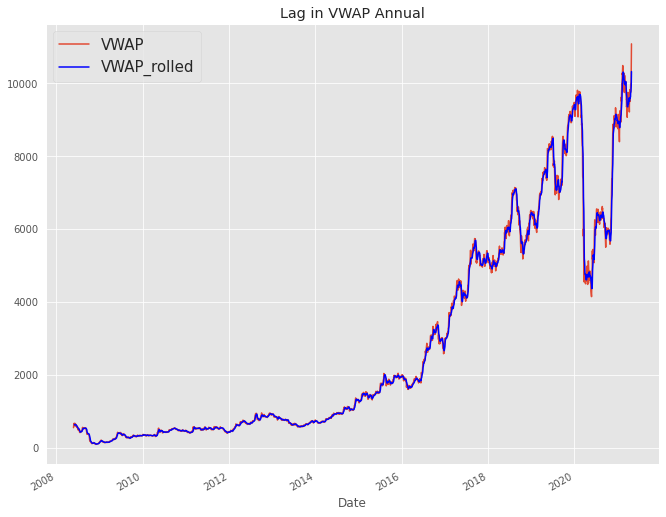

In [23]:
rolling_vwap = df['VWAP'].rolling(window=7)
df['VWAP_rolled'] = rolling_vwap.mean()
df['VWAP'].plot() 
df['VWAP_rolled'].plot(color='blue')
plt.title('Lag in VWAP Annual')
plt.legend(fontsize=15)
pyplot.show()

Autocorrelation plot

Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags. 

"Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot..." - Introduction to Time Series Forecasting With Python, Jason Brownlee.

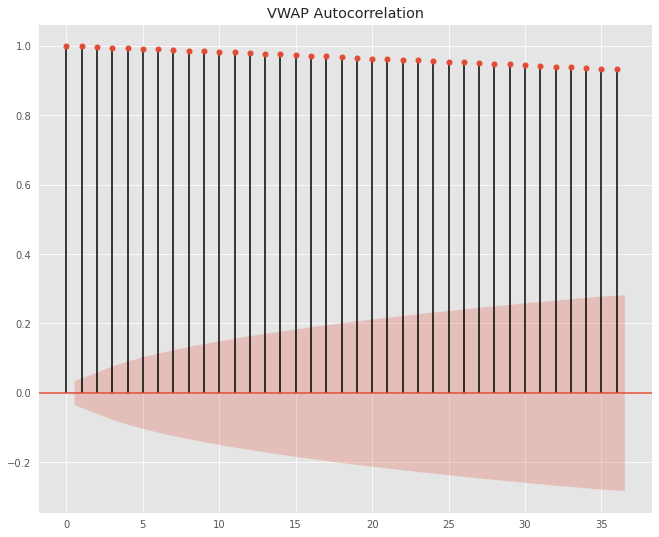

In [24]:
plot_acf(df['VWAP'],title="VWAP Autocorrelation")
plt.show()

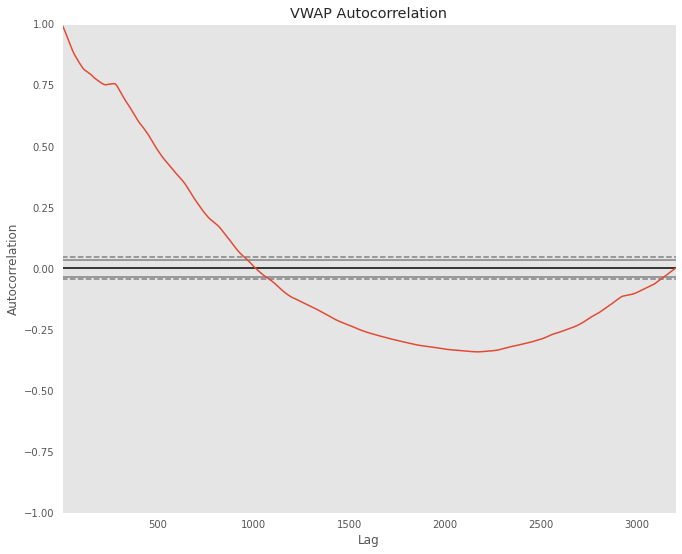

In [25]:
autocorrelation_plot(df['VWAP'])
plt.title('VWAP Autocorrelation')
pyplot.show()

Partial Autocorrelation

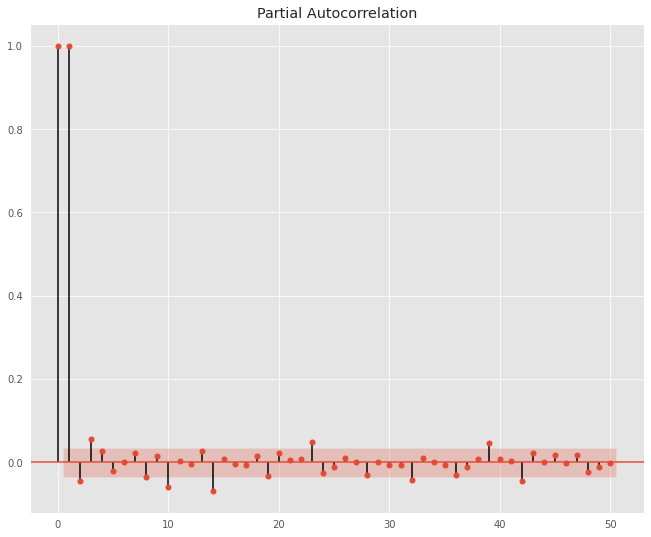

In [26]:
plot_pacf(df['VWAP'],lags=50)
plt.show()

Stationarity-

We'll check with the Augmented Dickey-Fuller test for stationarity in the dataset. 

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

In [27]:
result = adfuller(df['VWAP'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.550405
p-value: 0.986327
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Running the example prints the test statistic value of 0.55. 
If random, such autocorrelations should be near zero for any and all time-lag separations.

If non-random, then one or more of the autocorrelations will be significantly non-zero.

The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). 

Hence the values are relatively not random, but depend on the prior recorded values.

Decompose Time Series Data

"Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. 
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting."

-Introduction to Time Series Forecasting With Python, Jason Brownlee.

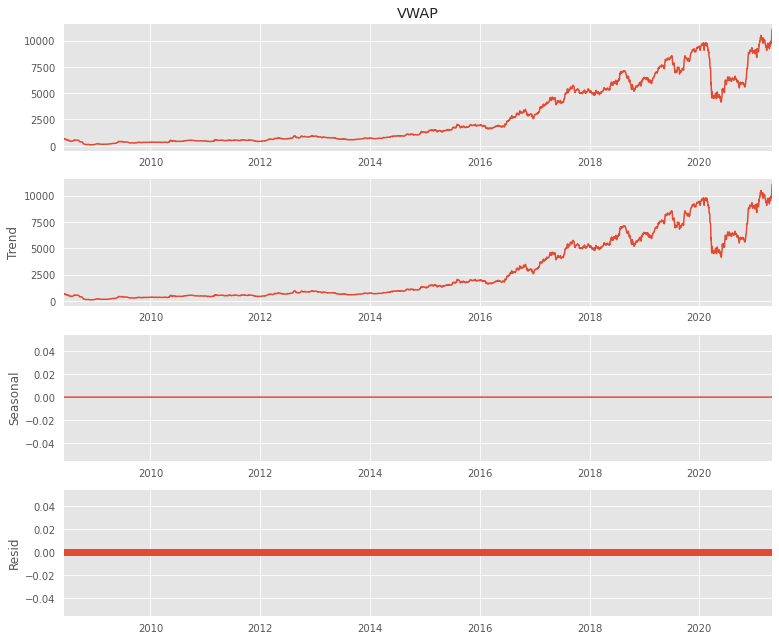

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose 
series = df['VWAP']
result = seasonal_decompose(series, model='additive', period=1) 
rcParams['figure.figsize'] = 11, 9
result.plot()
pyplot.show()

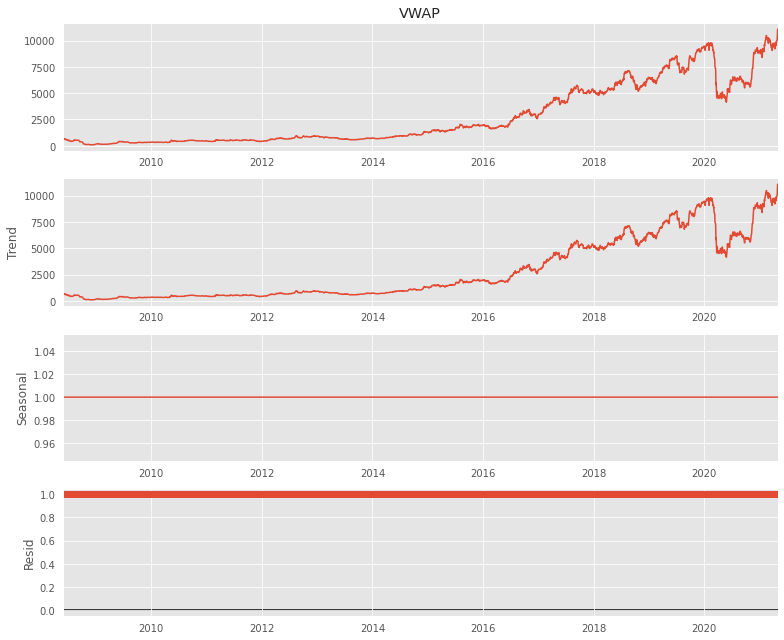

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose 
series = df['VWAP']
result = seasonal_decompose(series, model='multiplicative', period=1) 
rcParams['figure.figsize'] = 11, 9
result.plot()
pyplot.show()

In [30]:
df2 = df.copy()
df2.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,vwap_boxcox,VWAP_rolled
Date,,,,,,,,,,,,,,,,
2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,9576.2,908264,0.2888,5.712504,NaN
2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,9576.2,677627,0.1558,5.746464,NaN
2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,9576.2,774895,0.1689,5.809800,NaN
2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,9576.2,1006161,0.2225,5.862304,NaN
2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,9576.2,462832,0.1514,5.833204,NaN


Feature Engineering:

Appling sliding window statistic on columns to obtain lag values, to be used in modelling the dataset. The mean and standard lag values of the features will be useful to forcast out of sample or test sample of VWAP.

In [31]:
df2.reset_index(drop=False,inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df2[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df2[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df2[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df2[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df2[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df2[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df2[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df2[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df2[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df2.fillna(df.mean(), inplace=True)

df2.set_index("Date", drop=False, inplace=True)
df2.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,vwap_boxcox,VWAP_rolled,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,Turnover_mean_lag3,Turnover_mean_lag7,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,9576.2,908264,0.2888,5.712504,2755.799664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,9576.2,677627,0.1558,5.746464,2755.799664,619.000000,619.000000,619.000000,NaN,NaN,NaN,501.000000,501.000000,501.000000,NaN,NaN,NaN,3145446.0,3145446.00,3145446.00,NaN,NaN,NaN,1.726368e+14,1.726368e+14,1.726368e+14,NaN,NaN,NaN,9576.200195,9576.200195,9576.200195,NaN,NaN,NaN
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,9576.2,774895,0.1689,5.809800,2755.799664,614.974976,614.974976,614.974976,5.692210,5.692210,5.692210,496.049988,496.049988,496.049988,7.000357,7.000357,7.000357,3747295.0,3747295.00,3747295.00,851143.000000,851143.0000,851143.0000,2.107369e+14,2.107369e+14,2.107369e+14,5.388164e+13,5.388164e+13,5.388164e+13,9576.200195,9576.200195,9576.200195,0.0,0.0,0.0
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,9576.2,1006161,0.2225,5.862304,2755.799664,631.849976,631.849976,631.849976,29.504194,29.504194,29.504194,518.700012,518.700012,518.700012,39.542004,39.542004,39.542004,4027783.0,4027783.00,4027783.00,773461.562500,773461.5625,773461.5625,2.350756e+14,2.350756e+14,2.350756e+14,5.682195e+13,5.682195e+13,5.682195e+13,9576.200195,9576.200195,9576.200195,0.0,0.0,0.0
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,9576.2,462832,0.1514,5.833204,2755.799664,659.849976,649.637512,649.637512,46.293602,42.964081,42.964081,554.366638,541.025024,541.025024,59.042385,55.099934,55.099934,4486735.0,4151412.75,4151412.75,123703.664062,678207.7500,678207.7500,2.769607e+14,2.508797e+14,2.508797e+14,2.541759e+13,5.613884e+13,5.613884e+13,9576.200195,9576.200195,9576.200195,0.0,0.0,0.0


Months and Days are useful features to input in the model for predictions.

In [32]:
df2.Date = pd.to_datetime(df2.Date, format="%Y-%m-%d")
df2["month"] = df2.Date.dt.month
df2["day"] = df2.Date.dt.day

Preparing model

Note: The additional features supplied to time series problems are called exogenous regressors.

In [33]:
df2.dropna(axis =0,inplace=True)
#Dropping NULL or infinite values to avoid errors.
df2 =df2[~df2.isin([np.nan, np.inf, -np.inf]).any(1)]
df2=df2.resample('MS').sum()
df_train = df2[df2.index < "2019"]
df_valid = df2[df2.index >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "day"]

In [34]:
#Dataset with target variable and exogeneous features 
df3 = pd.DataFrame()
df3['VWAP'] = df2['VWAP']
for i in exogenous_features:
    df3[i] = df2[i]
print(pd.infer_freq(df3.index, warn=True))

MS


AutoRegressor:

A model that uses the dependent relationship between an observation and some number of lagged observations.
AR(1) model

Rt = μ + ϕRt-1 + εt

As RHS has only one lagged value(Rt-1)this is called AR model of order 1 where μ is mean and ε is noise at time t If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

AR(2) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

AR(3) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt

In [35]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df3.VWAP,lags=3, exog=df3[exogenous_features])
res = model.fit()
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))

                            AutoReg Model Results                             
Dep. Variable:                   VWAP   No. Observations:                  156
Model:                   AutoReg-X(3)   Log Likelihood                -996.519
Method:               Conditional MLE   S.D. of innovations            163.082
Date:                Thu, 30 Sep 2021   AIC                             10.672
Time:                        14:59:09   BIC                             11.405
Sample:                    08-01-2008   HQIC                            10.970
                         - 04-01-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0011      0.001      1.127      0.260      -0.001       0.003
VWAP.L1                -0.0023      0.003     -0.886      0.376      -0.007       0.003
VWAP.L2         

In [36]:
res = model.fit(cov_type="HC0")
print(res.summary())
print("μ={} ,ϕ={}".format(res.params[0],res.params[1]))

                            AutoReg Model Results                             
Dep. Variable:                   VWAP   No. Observations:                  156
Model:                   AutoReg-X(3)   Log Likelihood                -996.519
Method:               Conditional MLE   S.D. of innovations            163.082
Date:                Thu, 30 Sep 2021   AIC                             10.672
Time:                        14:59:10   BIC                             11.405
Sample:                    08-01-2008   HQIC                            10.970
                         - 04-01-2021                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.0011      0.001      1.088      0.277      -0.001       0.003
VWAP.L1                -0.0023      0.004     -0.530      0.596      -0.011       0.006
VWAP.L2         

No handles with labels found to put in legend.


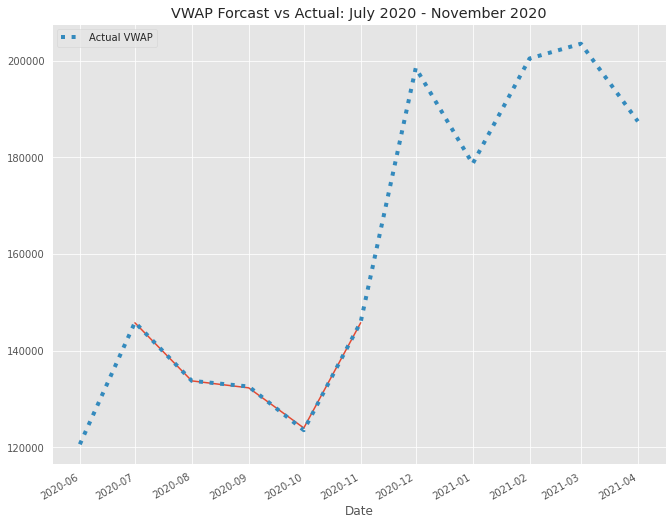

In [37]:
fig = res.plot_predict('2020-07-01', '2020-11-01')
ax = df3['VWAP'].loc['2020-06-01':].plot(linewidth=4, linestyle=':', label='Actual VWAP')
plt.title('VWAP Forcast vs Actual: July 2020 - November 2020')
plt.legend()
plt.show()

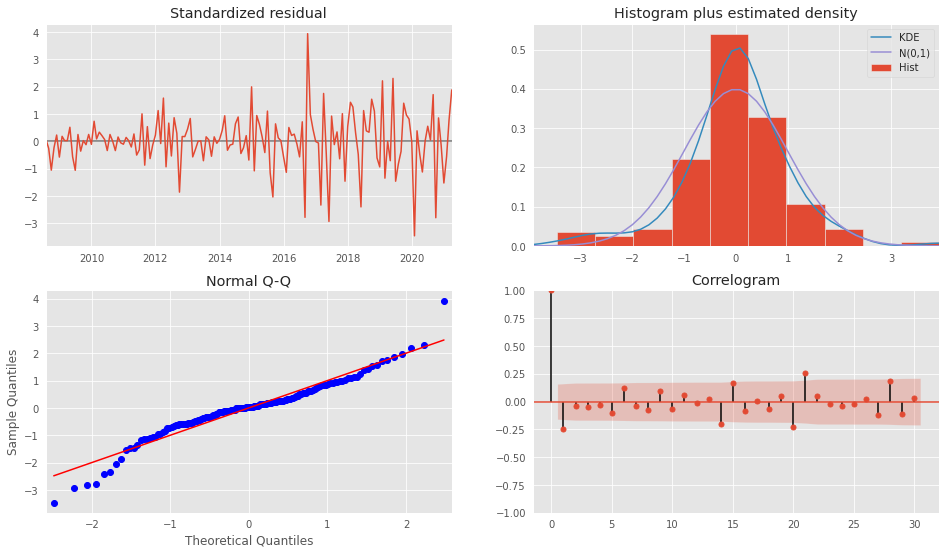

In [38]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [39]:
rmse = math.sqrt(mean_squared_error(df3['VWAP'].loc['2014-01-01':'2020-11-01'],res.predict(start='2014-01-01',end='2020-11-01') ))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 201.41079975519358.


AutoRegressor has a good score! Now let's try ARIMA model.

ARIMA Models

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

In [40]:
from pmdarima.arima import auto_arima
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1661.150, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1652.316, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1637.068, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1635.219, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2144.383, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1637.011, Time=0.50 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1637.182, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1659.127, Time=0.55 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1633.245, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1635.035, Time=0.54 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1635.205, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1635.085, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1657.136, Time=0.56 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 6.179 seconds


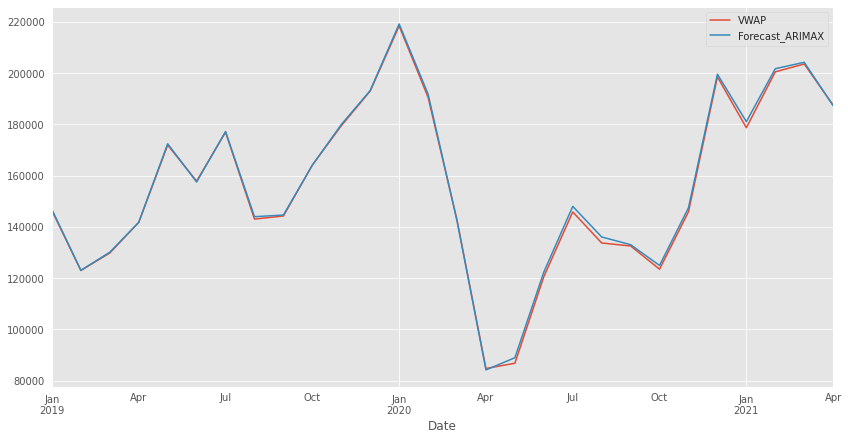

In [41]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 1130.8598929382154

MAE of Auto ARIMAX: 865.0179701449888


ARIMA models give a fair rmse and mae score. Let's see if deep learning models can do a better job in fitting to our dataset.

Deep Learning Models

Let's explore some deep learning models on the dataset. We'll try LTSM and RNN. RNN, a model designed for allowing information to persist in short term memory to predict subsequent values, should be best suited to our dataset, since we can see that autocorrelations don't show signs of seasonality, it tends to be manipulated by recent previous prices. We'll also apply LTSM, the special RNN model, which might reveal some interesting long term dependencies or relations in the dataset. Let's explore!

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
df4=df3.copy()

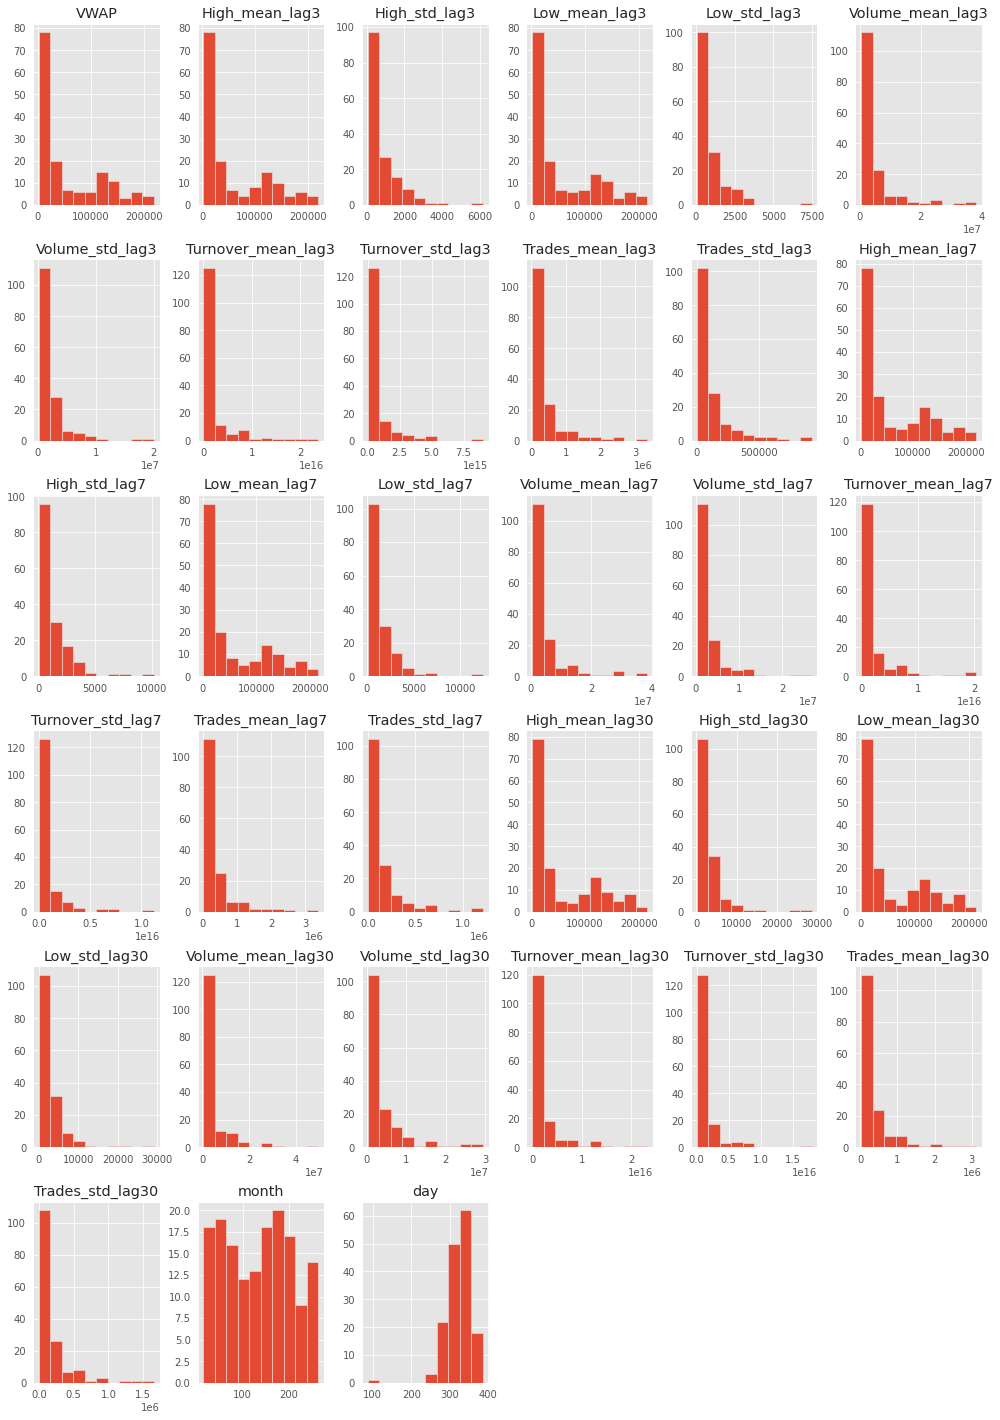

In [44]:
fig = plt.figure(figsize = (17,25))
ax = fig.gca()
hist = df4.hist(ax = ax)

In [45]:
dataset = df4.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
X_train = train[:,1:]
y_train = train[:,0]
X_test = test[:,1:]
y_test = test[:,0]

In [46]:
batch_size = 1
timesteps = 1
units = 100
nb_epoch = 70

In [47]:
X_train = X_train.reshape(X_train.shape[0],timesteps,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],timesteps,X_test.shape[1])

In [48]:
model = Sequential()
model.add(LSTM(units,batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train,epochs=nb_epoch,batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=21)],verbose=0,shuffle=False)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 100)                  53200     
_________________________________________________________________
dense (Dense)                (1, 1)                    101       
Total params: 53,301
Trainable params: 53,301
Non-trainable params: 0
_________________________________________________________________


In [49]:
yhat = model.predict(X_test, batch_size=batch_size)
rmse = sqrt(mean_squared_error(y_test, yhat))
mae=mean_absolute_error(y_test, yhat)
print('rmse:{} MAE:{}'.format(rmse,mae))

rmse:0.07261386937629645 MAE:0.05820581689476967


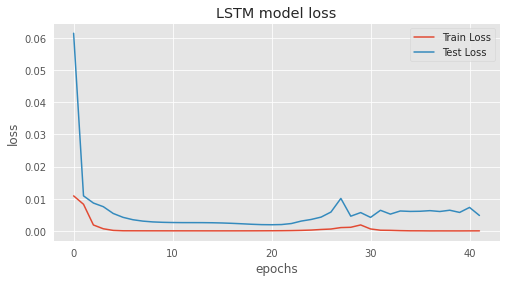

In [50]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

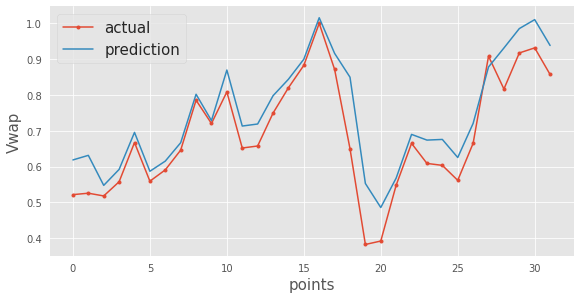

In [51]:
plt.figure(figsize=(8,4))
plt.plot(y_test, marker='.', label="actual")
plt.plot(yhat, label="prediction")
plt.tick_params(left=False, labelleft=True)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Vwap', size=15)
plt.xlabel('points', size=15)
plt.legend(fontsize=15)
plt.show();

LSTM gives an excellent score on our dataset. Let's checkout a simple RNN model!

In [52]:
model = Sequential()
model.add(SimpleRNN(units,batch_input_shape=(batch_size, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train,epochs=nb_epoch,batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=21)],verbose=0,shuffle=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (1, 100)                  13300     
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    101       
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________


In [53]:
yhat2 = model.predict(X_test, batch_size=batch_size)
rmse = sqrt(mean_squared_error(y_test, yhat))
mae=mean_absolute_error(y_test, yhat2)
print('rmse:{} MAE:{}'.format(rmse,mae))

rmse:0.07261386937629645 MAE:0.07661879062652588


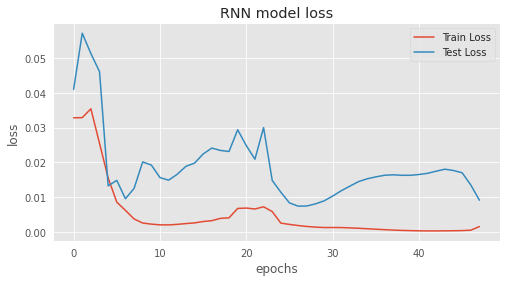

In [54]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

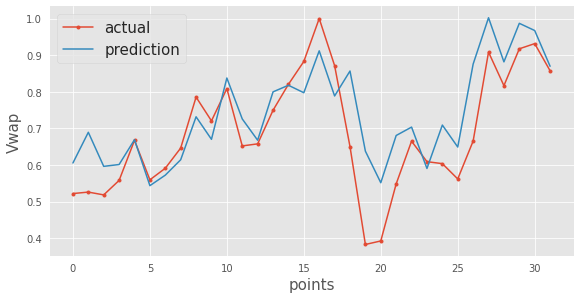

In [55]:
plt.figure(figsize=(8,4))
plt.plot(y_test, marker='.', label="actual")
plt.plot(yhat2, label="prediction")
plt.tick_params(left=False, labelleft=True)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Vwap', size=15)
plt.xlabel('points', size=15)
plt.legend(fontsize=15)
plt.show();

RNN performs rather poorly, in comparison to LTSM model, Though the RMSE score turned out to be the same approximately, MAE has increased by 3-4%, as we can see the results from the graphs above. We can say that, when we move from RNN to LSTM, we are introducing more & more controlling knobs, which control the flow and mixing of Inputs as per trained Weights. And thus, bringing in more flexibility in controlling the outputs. Thus, we obtain better results in LTSM.